# Librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# data

In [2]:
path = 'Mall_Customers.csv'
df = pd.read_csv(path)
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

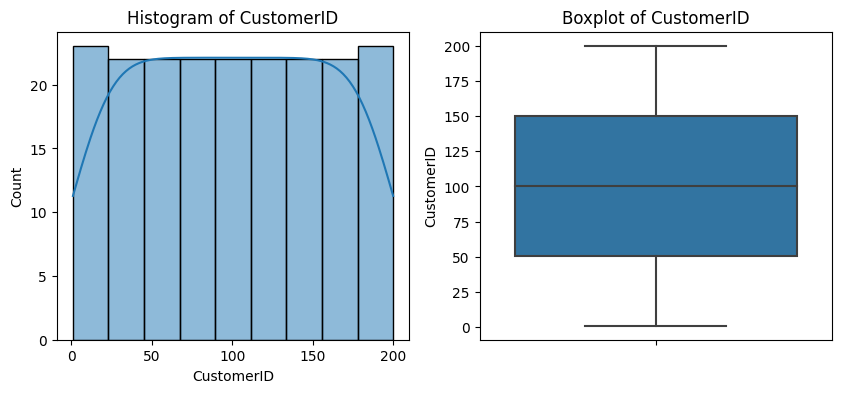

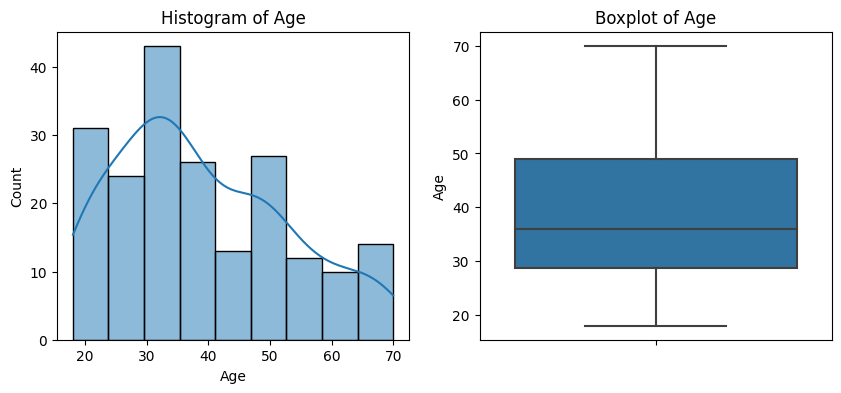

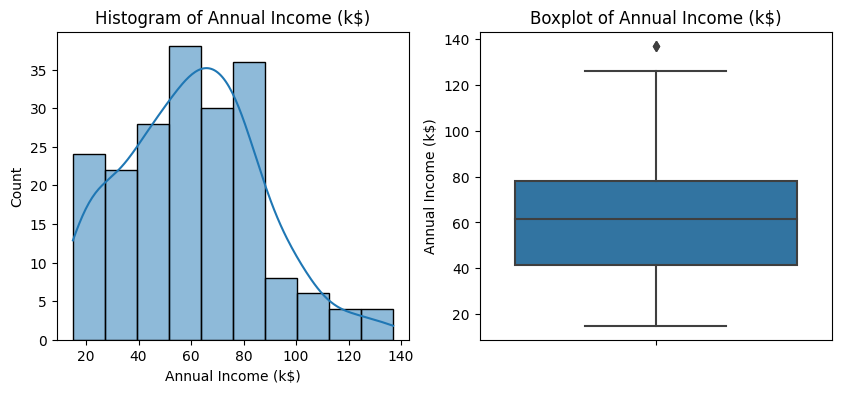

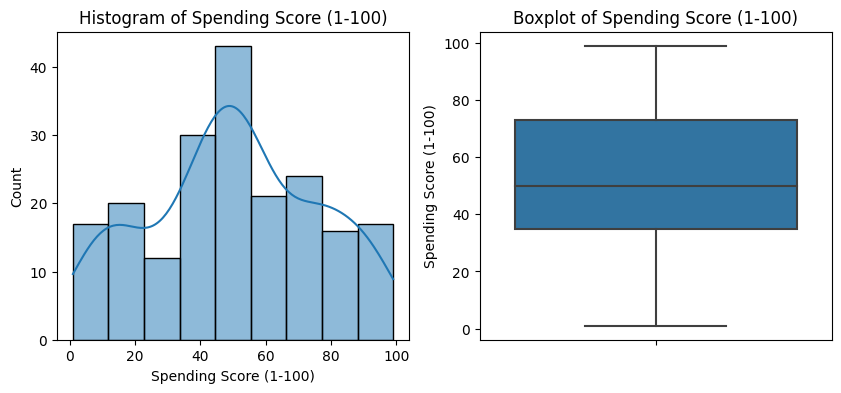

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

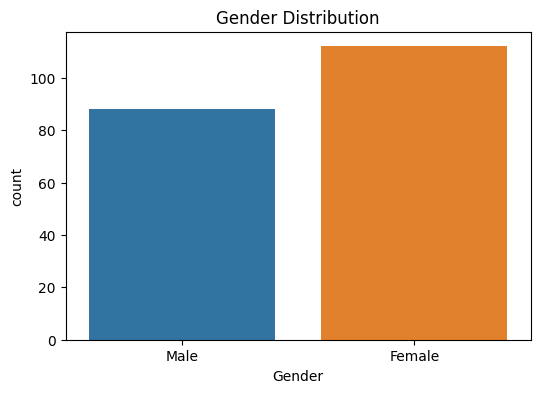

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

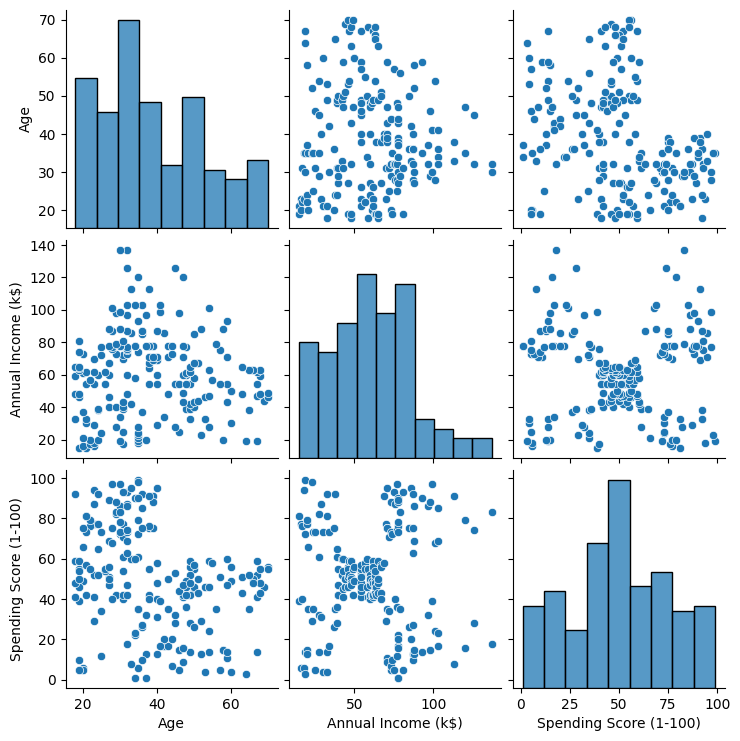

In [8]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

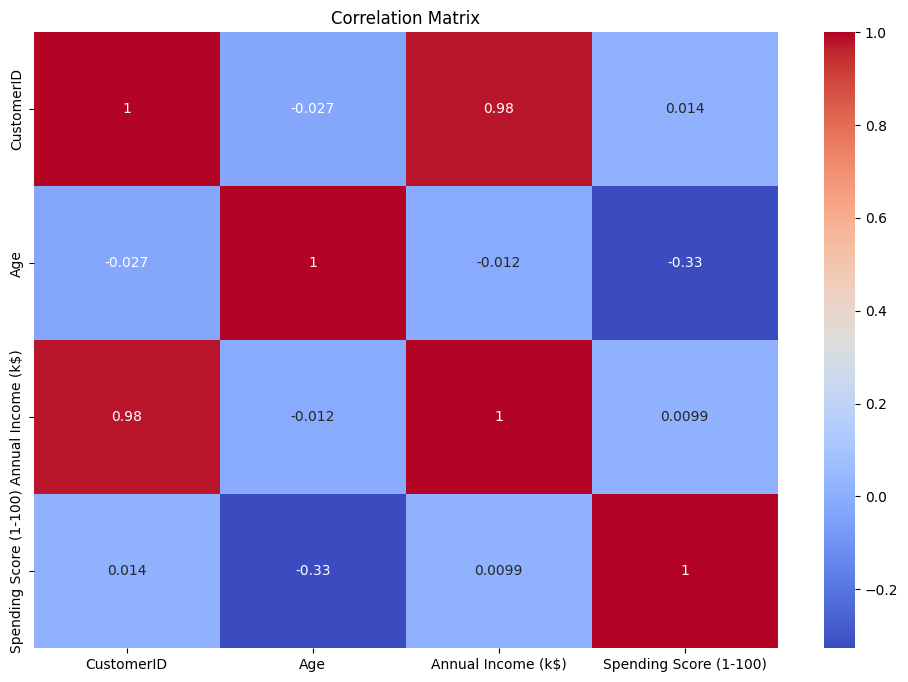

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [10]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
scaled_df['Gender'] = df['Gender']

In [11]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


# Kmeans

## elbow method

In [12]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

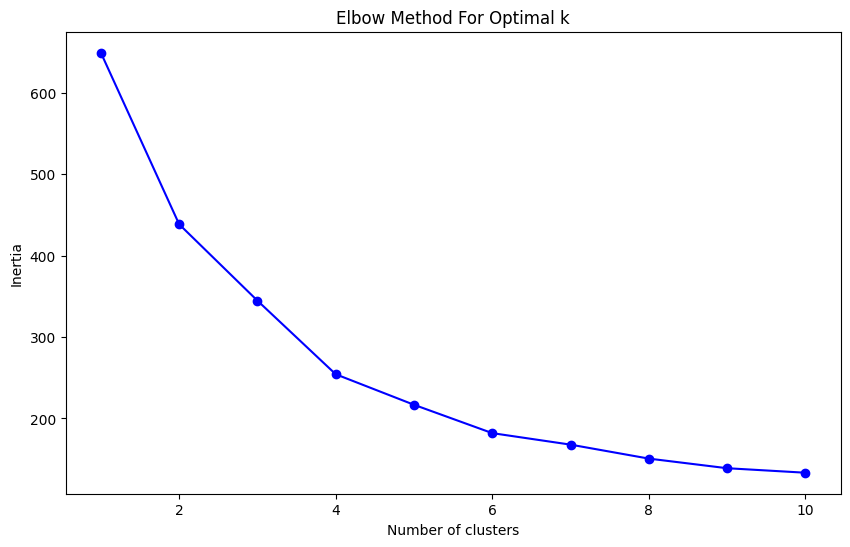

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## model

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [15]:
scaled_df['Cluster'] = kmeans.labels_

In [16]:
silhouette_K = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette_K}')

Silhouette Score: 0.4859240849339679


In [17]:
davies_bouldin_K = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f'Davis Score: {davies_bouldin_K}')

Davis Score: 0.8107155795967766


In [18]:
calinski_harabasz_K = calinski_harabasz_score(scaled_df, kmeans.labels_)
print(f'Calinski: {calinski_harabasz_K}')

Calinski: 178.96860911282272


## stat

In [19]:
kmeans_summary = scaled_df.groupby('Cluster').mean()

kmeans_summary['Age_std'] = scaled_df.groupby('Cluster')['Age'].std()
kmeans_summary['Annual Income (k$)_std'] = scaled_df.groupby('Cluster')['Annual Income (k$)'].std()
kmeans_summary['Spending Score (1-100)_std'] = scaled_df.groupby('Cluster')['Spending Score (1-100)'].std()

kmeans_summary

,Age,Annual Income (k$),Spending Score (1-100),Gender,Age_std,Annual Income (k$)_std,Spending Score (1-100)_std
Cluster,,,,,,,
0,1.198627,-0.460981,-0.327038,0.431034,0.597452,0.526627,0.607895
1,-0.441917,0.991583,1.239503,0.461538,0.267593,0.622638,0.363544
2,-0.781722,-0.403069,-0.215914,0.340426,0.524599,0.637605,0.505810
3,0.173295,1.066454,-1.298010,0.588235,0.772811,0.631065,0.383607
4,-0.974396,-1.329545,1.132178,0.409091,0.377280,0.288818,0.407788


## viz

In [20]:
def create_radar_chart(data, title, labels):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for cluster in scaled_df['Cluster'].unique():
        values = scaled_df[scaled_df['Cluster'] == cluster][labels].mean().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    plt.title(title)
    plt.show()

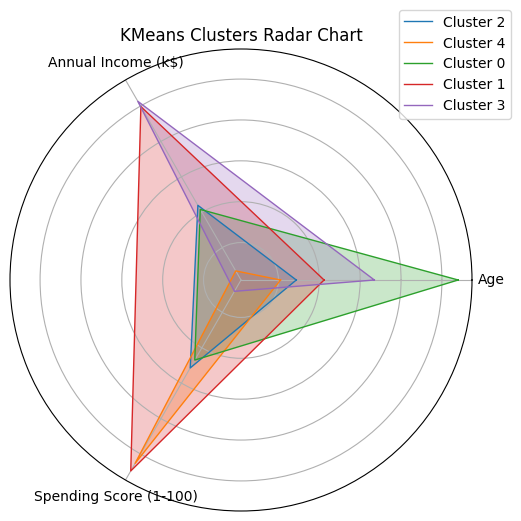

In [21]:
labels = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
create_radar_chart(scaled_df, 'KMeans Clusters Radar Chart', labels)

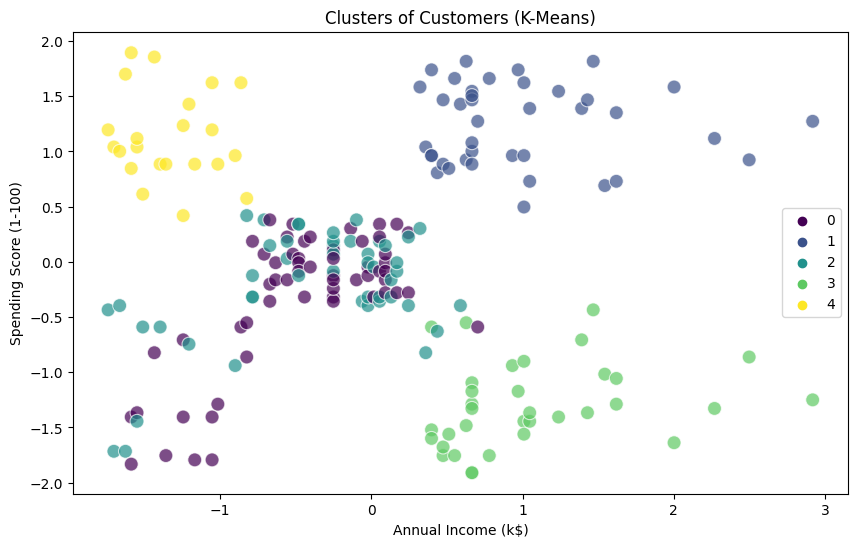

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

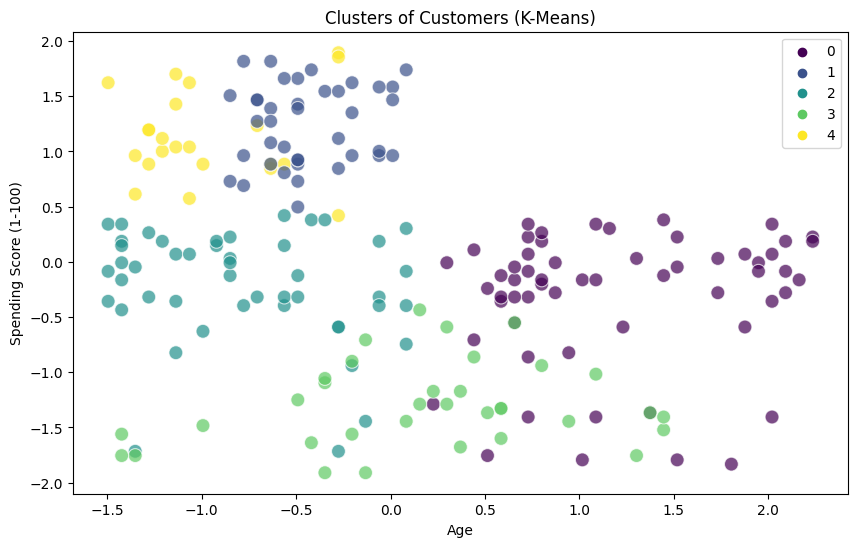

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (K-Means)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

## dendogramme

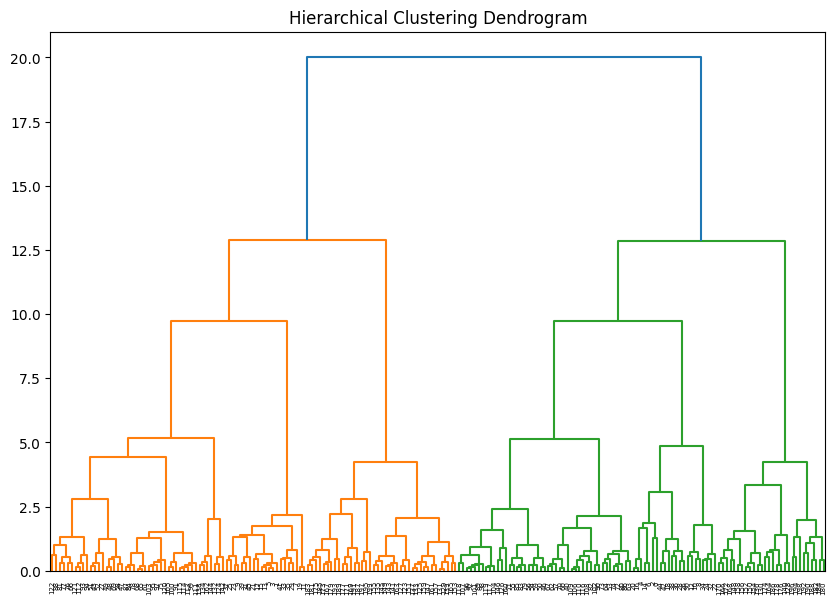

In [24]:
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## model

In [25]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels = hierarchical_clustering.fit_predict(scaled_df.iloc[:, :-1])
scaled_df['Agg_Cluster'] = cluster_labels

In [26]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster,Agg_Cluster
0,-1.424569,-1.738999,-0.434801,1,2,4
1,-1.281035,-1.738999,1.195704,1,4,0
2,-1.352802,-1.700830,-1.715913,0,2,4
3,-1.137502,-1.700830,1.040418,0,4,0
4,-0.563369,-1.662660,-0.395980,0,2,4
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,1,3
196,0.441365,2.497807,-0.861839,0,3,2
197,-0.491602,2.497807,0.923953,1,1,3
198,-0.491602,2.917671,-1.250054,1,3,2


In [27]:
silhouette_H = silhouette_score(scaled_df.iloc[:, :-2].join(scaled_df.iloc[:, -1]), cluster_labels)
print(f'Silhouette Score: {silhouette_H}')

Silhouette Score: 0.4900497708658173


In [28]:
davies_bouldin_H = davies_bouldin_score(scaled_df.iloc[:, :-2].join(scaled_df.iloc[:, -1]), cluster_labels)
print(f'Davis Score: {davies_bouldin_H}')

Davis Score: 0.7968533742299373


In [29]:
calinski_harabasz_H = calinski_harabasz_score(scaled_df.iloc[:, :-2].join(scaled_df.iloc[:, -1]), cluster_labels)
print(f'Calinski: {calinski_harabasz_H}')

Calinski: 169.59809032463872


## stat

In [30]:
agg_summary = scaled_df.groupby('Agg_Cluster').mean()

agg_summary['Age_std'] =scaled_df.groupby('Agg_Cluster')['Age'].std()
agg_summary['Annual Income (k$)_std'] = scaled_df.groupby('Agg_Cluster')['Annual Income (k$)'].std()
agg_summary['Spending Score (1-100)_std'] = scaled_df.groupby('Agg_Cluster')['Spending Score (1-100)'].std()

agg_summary

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster,Age_std,Annual Income (k$)_std,Spending Score (1-100)_std
Agg_Cluster,,,,,,,,
0,-0.927151,-0.593258,0.400531,0.344828,2.758621,0.437648,0.678420,0.673440
1,1.156161,-0.264896,-0.076090,0.500000,0.200000,0.647438,0.382464,0.276915
2,0.186920,1.089009,-1.320639,0.545455,2.909091,0.801792,0.627940,0.365786
3,-0.441917,0.991583,1.239503,0.461538,1.000000,0.267593,0.622638,0.363544
4,0.351657,-1.347763,-1.209292,0.350000,0.900000,0.954616,0.282360,0.501207


## viz

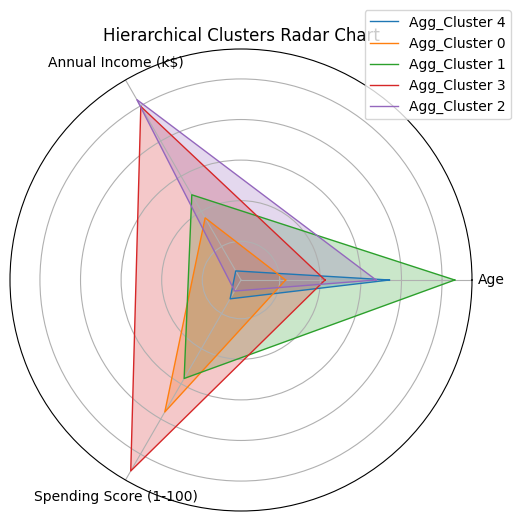

In [31]:
def create_radar_chart(df, title, labels):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for cluster in scaled_df['Agg_Cluster'].unique():
        values = scaled_df[scaled_df['Agg_Cluster'] == cluster][labels].mean().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Agg_Cluster {cluster}')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    plt.title(title)
    plt.show()

labels = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
create_radar_chart(df, 'Hierarchical Clusters Radar Chart', labels)

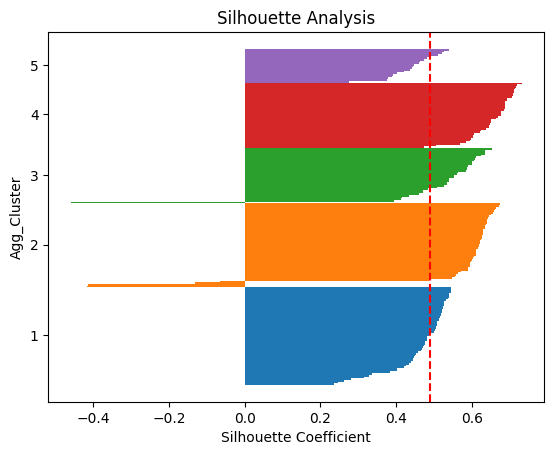

In [32]:
silhouette_vals = silhouette_samples(scaled_df, cluster_labels)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(cluster_labels)):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_H, color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(cluster_labels) + 1)
plt.ylabel('Agg_Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Analysis')
plt.show()

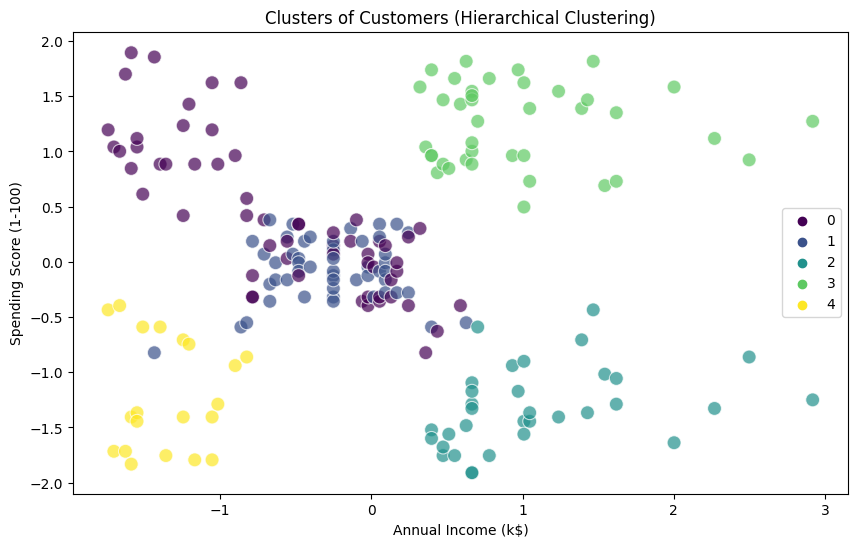

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

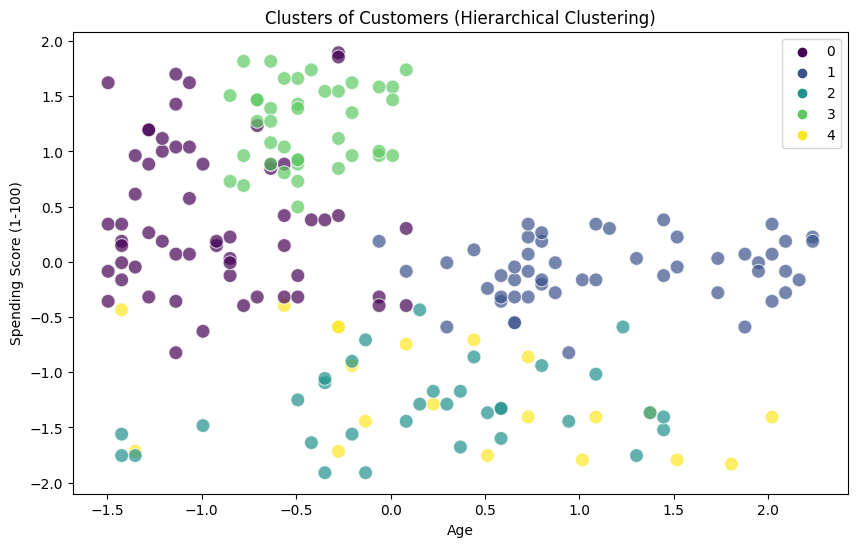

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Age', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## explication

# DBSCAN

In [35]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

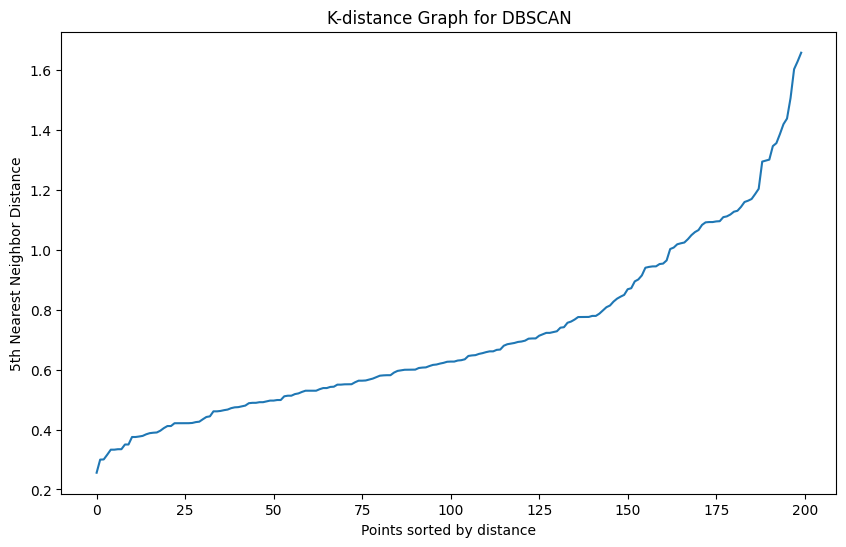

In [36]:
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

In [37]:
best_score = -1
best_params = None

for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        labels = dbscan.fit_predict(scaled_df.drop(scaled_df.columns[-2], axis=1))
        
        if len(set(labels)) > 1:
            score = silhouette_score(scaled_df.drop(scaled_df.columns[-2], axis=1), labels)
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best silhouette score: {best_score} with eps: {best_params[0]} and min_samples: {best_params[1]}")

Best silhouette score: 0.2804691505500038 with eps: 0.7000000000000001 and min_samples: 2


In [38]:
dbscan_best = DBSCAN(eps=best_params[0], min_samples=best_params[1])
final_labels = dbscan_best.fit_predict(scaled_df.drop(scaled_df.columns[-2], axis=1))

scaled_df['DBSCAN_Cluster'] = cluster_labels

In [40]:
silhouette_D = silhouette_score(scaled_df.iloc[:, :-2], cluster_labels)
print(f'Silhouette Score: {silhouette_D}')

Silhouette Score: 0.37984826444515446


In [41]:
davies_bouldin_D = davies_bouldin_score(scaled_df.iloc[:, :-2], cluster_labels)
print(f'Davis Score: {davies_bouldin_D}')

Davis Score: 1.120948494692944


In [42]:
calinski_harabasz_D = calinski_harabasz_score(scaled_df.iloc[:, :-2], cluster_labels)
print(f'Calinski: {calinski_harabasz_D}')

Calinski: 99.41084710585947


# Evaluation modeles

In [43]:
evaluation_metrics = {
    'Algorithm': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [silhouette_K, silhouette_H, silhouette_D],
    'Davies_Bouldin' : [davies_bouldin_K, davies_bouldin_H, davies_bouldin_D],
    'Calinski' : [calinski_harabasz_K, calinski_harabasz_H, calinski_harabasz_D]
}

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Algorithm,Silhouette Score,Davies_Bouldin,Calinski
0,KMeans,0.485924,0.810716,178.968609
1,Hierarchical,0.490050,0.796853,169.598090
2,DBSCAN,0.379848,1.120948,99.410847


# info supplémentaire


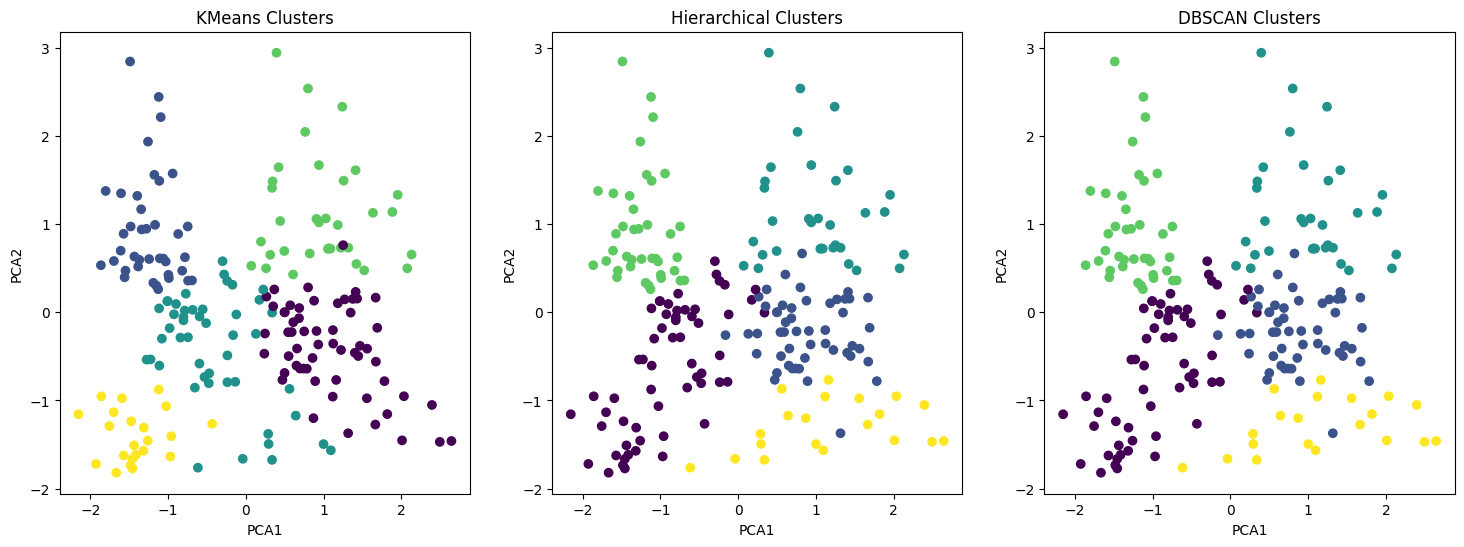

In [44]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

scaled_df['PCA1'] = pca_components[:, 0]
scaled_df['PCA2'] = pca_components[:, 1]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(scaled_df['PCA1'], scaled_df['PCA2'], c=scaled_df['Cluster'], cmap='viridis')
axs[0].set_title('KMeans Clusters')
axs[0].set_xlabel('PCA1')
axs[0].set_ylabel('PCA2')

axs[1].scatter(scaled_df['PCA1'], scaled_df['PCA2'], c=scaled_df['Agg_Cluster'], cmap='viridis')
axs[1].set_title('Hierarchical Clusters')
axs[1].set_xlabel('PCA1')
axs[1].set_ylabel('PCA2')

axs[2].scatter(scaled_df['PCA1'], scaled_df['PCA2'], c=scaled_df['DBSCAN_Cluster'], cmap='viridis')
axs[2].set_title('DBSCAN Clusters')
axs[2].set_xlabel('PCA1')
axs[2].set_ylabel('PCA2')

plt.show()
